In [24]:
%matplotlib inline

from matplotlib import pyplot as pl
from scipy.integrate import odeint
import numpy as np

# A solar system simulator demonstration in python

This example notebook will show you how to simulate an Earth-Moon 1 body system.

Firstly we'll define a function that defines the coupled ordinary differential equations that are required. For the motion of body $i$, under the influence of the gravitational field of body $j$, we have:

$$
\frac{{\rm d}x_i}{{\rm d}t} = v_{x,i}, \frac{{\rm d}y_i}{{\rm d}t} = v_{y,i}, \frac{{\rm d}z_i}{{\rm d}t} = v_{z,i},
$$

and

$$
\frac{{\rm d}v_{x,i}}{{\rm d}t} = a_{x,i} \equiv \frac{F_{x,i}}{m_i} = \frac{Gm_j \hat{r}_x}{r^2} = \frac{Gm_j \left(x_j-x_i\right)}{r^3},
$$

$$
\frac{{\rm d}v_{y,i}}{{\rm d}t} = \frac{Gm_j \left(y_j-y_i\right)}{r^3},
$$

$$
\frac{{\rm d}v_{z,i}}{{\rm d}t} = \frac{Gm_j \left(z_j-z_i\right)}{r^3},
$$

where $r = \left(\left(x_j-x_i\right)^2 + \left(y_j-y_i\right)^2 + \left(z_j-z_i\right)^2 \right)^{1/2}$.

In [13]:
def grav(x, t, masses):
    """Example function for calculating rate of change of Earth's position wrt time"""


    Y = np.zeros(4)
    # coupled differential equations
    # x = [x,y,vx,vy]
    
    #calculate r
    r = np.sqrt((x[0])**2+(x[1])**2)
    # 3D orbits
    # dx/dt = v
    Y[0] = x[2]
    Y[1] = x[3]
    
    # dv/dt = a  (a = F/m) (F = GMm|x2-x1|/r^3)
    #x1=[0,0]
    Y[2] = masses*(x[0])/r**3        
    Y[3] = masses*(x[1])/r**3
    
    return Y

To initialise the solar system (positions and velocities), to start with just the Earth/and assume the Sun is at [0,0], we can use the JPL ephemeris values. We also need masses of the planets, which are given as ratios to the mass of the Sun, which in turn is defined though the [Gaussian gravitational constant](https://en.wikipedia.org/wiki/Gaussian_gravitational_constant).

In [14]:
# set mass
GM = -(0.01720209895)**2 

# set up the initial position of the Earth in units of AU and AU/day:
X = np.zeros(4)

# Earth's initial position and velocity
X[0] = -1.756895992827094E-01
X[1] =  9.659716383076408E-01
X[2] = -1.722463621150023E-02
X[3] = -3.020684839068507E-03



# set the timesteps(note that this does not use adaptive step sizes unlike matlab)
times = np.arange(0., 3650.,0.25) # ten years 

y, infodict = odeint(grav, X, times, args=(GM,), full_output=True)


Now, we can plot the positions of the Earth.

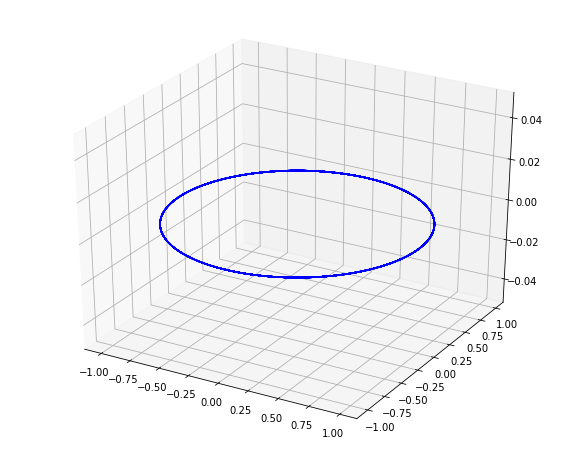

In [23]:
from mpl_toolkits.mplot3d import Axes3D

fig = pl.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(y[:,0], y[:,1], 'b')


Now go forth and make this 3-dimensional then 2-body then N-body!!